In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import sweetviz as sv

In [212]:
#Load the dataset
df = pd.read_csv('telco-customer-churn.csv')

#Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [213]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [214]:
df2 = df.drop(columns=["gender", "customerID"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [215]:
#df2['totalcharges'] = df2['totalcharges'].astype(float)

In [216]:
step1 = [len(i.split()) for i in df2['TotalCharges']] # splitting individual elements of 'Total_Charges'
step2 = [i for i in range(len(step1)) if step1[i] != 1] # storing the index values of 'Total_Charges' where length is not equal to 1.
print('Number of entries with empty string: ', len(step2))


Number of entries with empty string:  11


In [217]:
df2 = df2.drop(step2, axis = 0).reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   object 
 2   Dependents        7032 non-null   object 
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   object 
 5   MultipleLines     7032 non-null   object 
 6   InternetService   7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   OnlineBackup      7032 non-null   object 
 9   DeviceProtection  7032 non-null   object 
 10  TechSupport       7032 non-null   object 
 11  StreamingTV       7032 non-null   object 
 12  StreamingMovies   7032 non-null   object 
 13  Contract          7032 non-null   object 
 14  PaperlessBilling  7032 non-null   object 
 15  PaymentMethod     7032 non-null   object 
 16  MonthlyCharges    7032 non-null   float64


In [218]:
df2['TotalCharges'] = df2['TotalCharges'].astype(float)

In [219]:
#check for duplicates
#print('Number of duplicated values in dataset: ', df2.duplicated().sum())

In [220]:
#df.drop_duplicates(inplace=True)

In [221]:
labelencoder = LabelEncoder()
def process_column(column):
    column = column.replace(["No phone service", "No internet service"], "2")
    column = column.replace("Yes", "1")
    column = column.replace("No", "0")
    return pd.to_numeric(column, errors='coerce')

columns = ["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity" ,"OnlineBackup" , "DeviceProtection", "TechSupport","StreamingTV" ,"StreamingMovies", "Churn"]

for column in columns:
    df2[column] = process_column(df2[column])

categorical_columns = ["Contract", "PaperlessBilling", "PaymentMethod","InternetService"]
for column in categorical_columns:
    df2[column] = labelencoder.fit_transform(df2[column])

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int64  
 2   Dependents        7032 non-null   int64  
 3   tenure            7032 non-null   int64  
 4   PhoneService      7032 non-null   int64  
 5   MultipleLines     7032 non-null   int64  
 6   InternetService   7032 non-null   int32  
 7   OnlineSecurity    7032 non-null   int64  
 8   OnlineBackup      7032 non-null   int64  
 9   DeviceProtection  7032 non-null   int64  
 10  TechSupport       7032 non-null   int64  
 11  StreamingTV       7032 non-null   int64  
 12  StreamingMovies   7032 non-null   int64  
 13  Contract          7032 non-null   int32  
 14  PaperlessBilling  7032 non-null   int32  
 15  PaymentMethod     7032 non-null   int32  
 16  MonthlyCharges    7032 non-null   float64


In [222]:
df2

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7028,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7029,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7030,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [223]:
l1 = ['SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

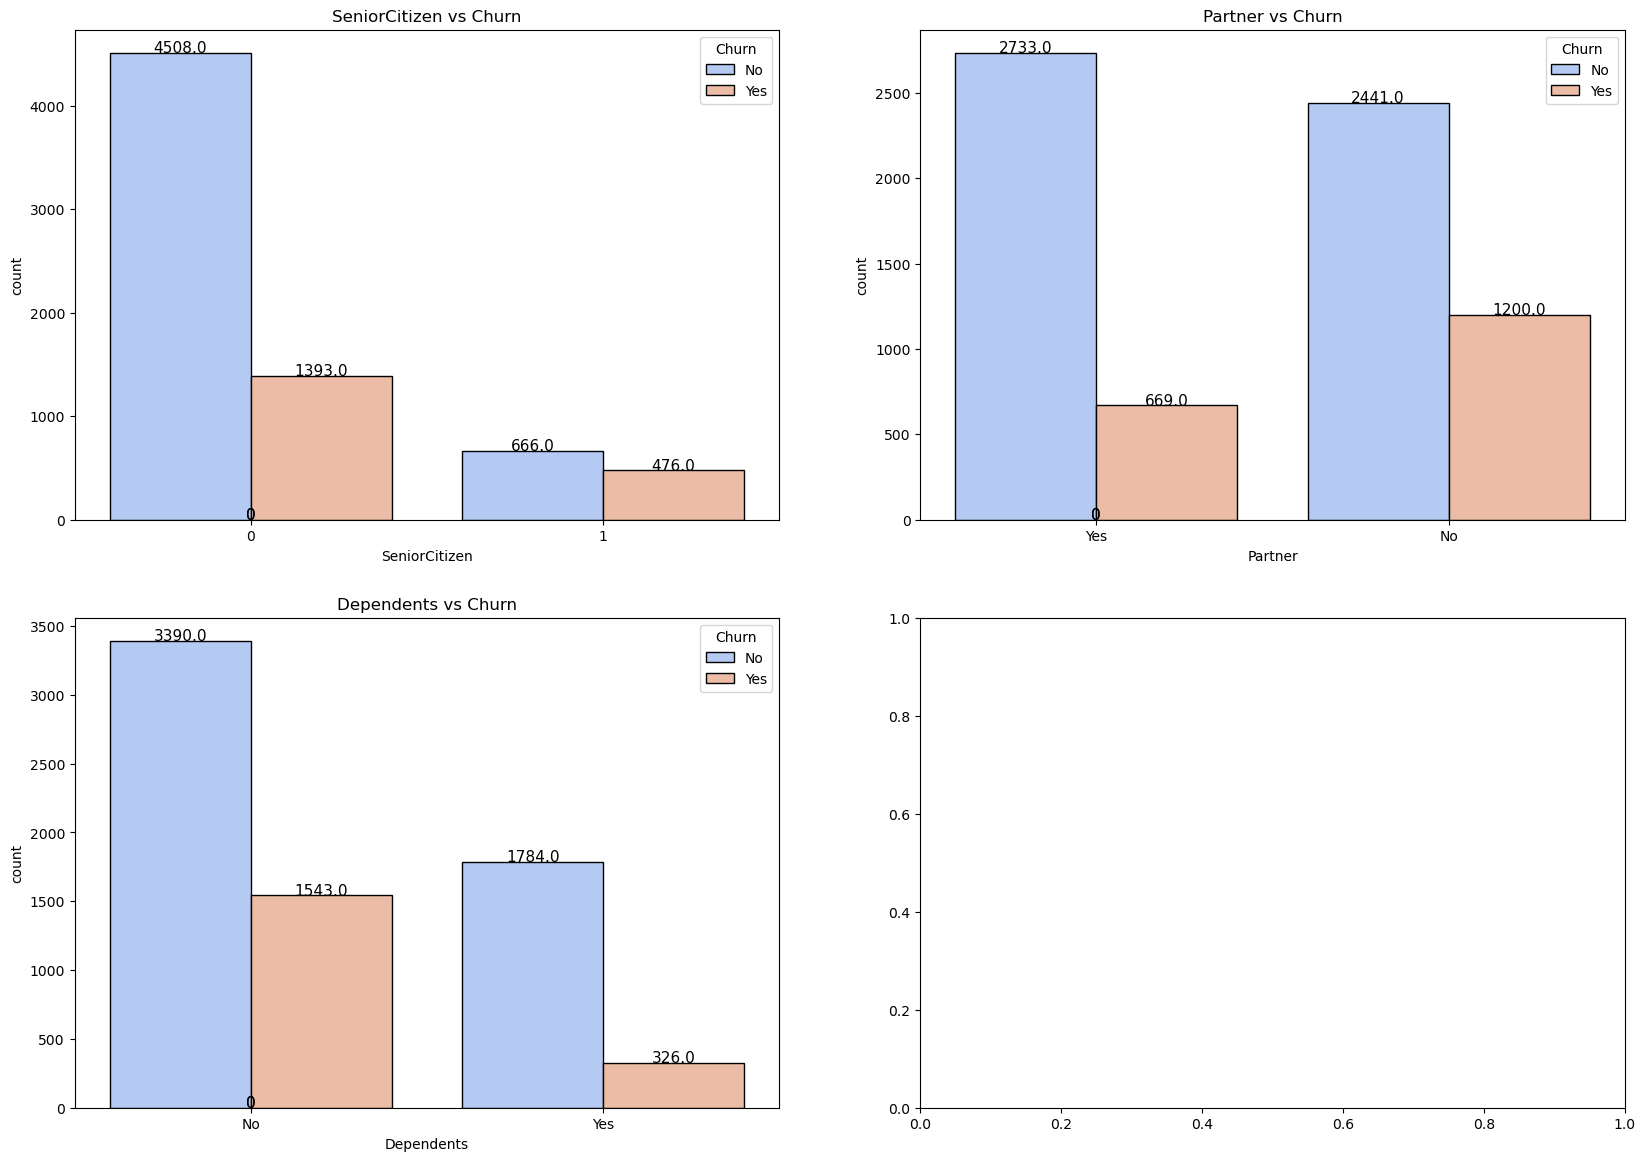

In [224]:
#SeniorCitizen | Partner | Dependents

fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
colors = 'coolwarm'
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x= l1[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l1[i] + ' vs Churn'
    plt.title(title);

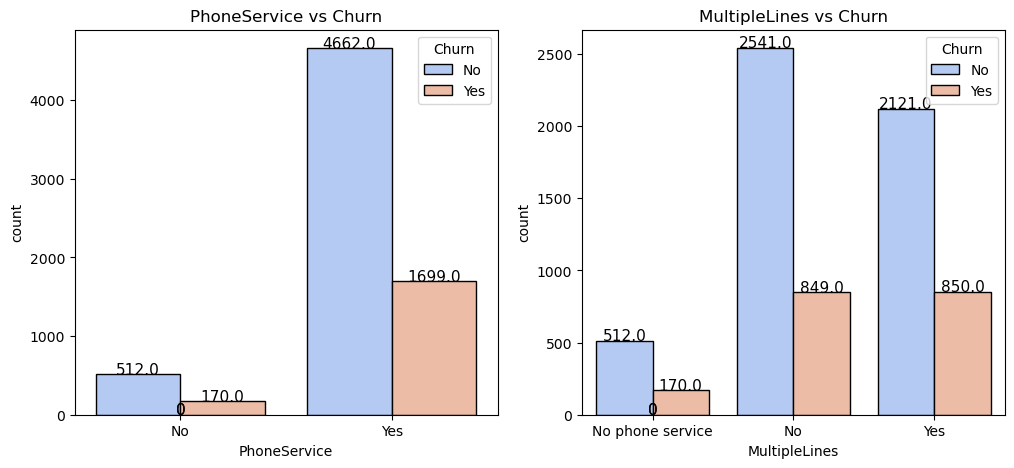

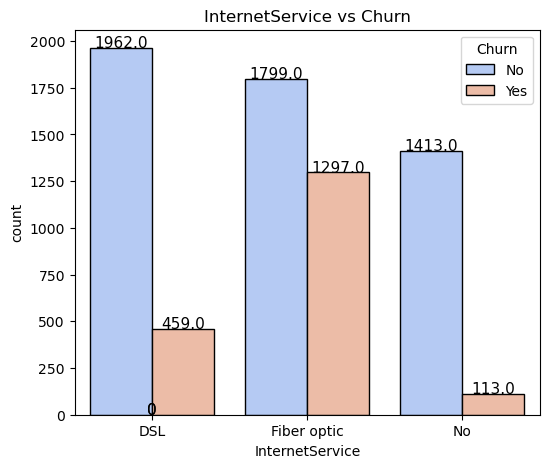

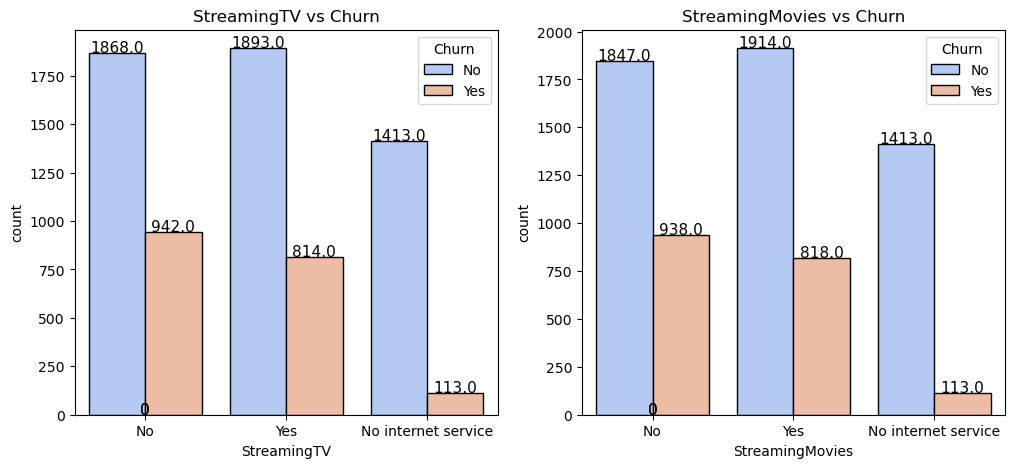

In [225]:
#PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies 

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i] + ' vs Churn'
    plt.title(title);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.countplot(x=l2[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l2[2] + ' vs Churn'
plt.title(title);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=l2[i + 3],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[i + 3] + ' vs Churn'
    plt.title(title);

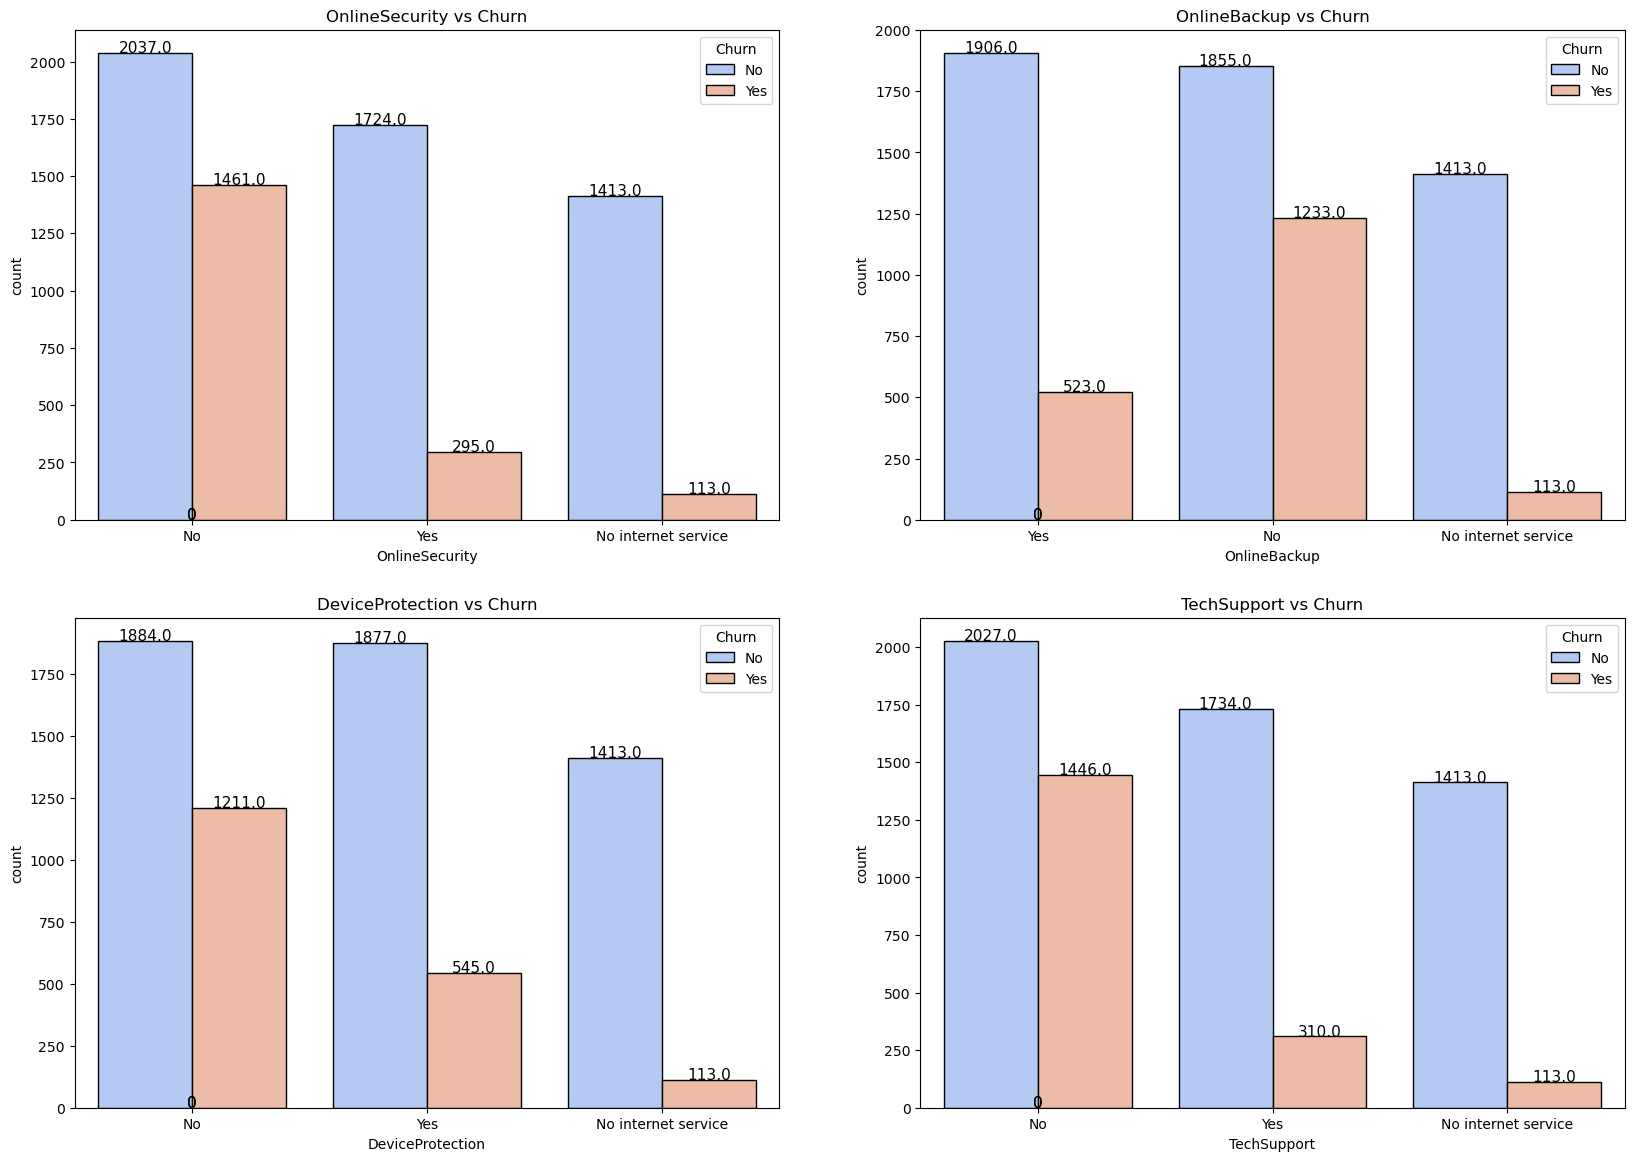

In [226]:
#OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport 

fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=l2[-4 + i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = l2[-4 + i] + ' vs Churn'
    plt.title(title);

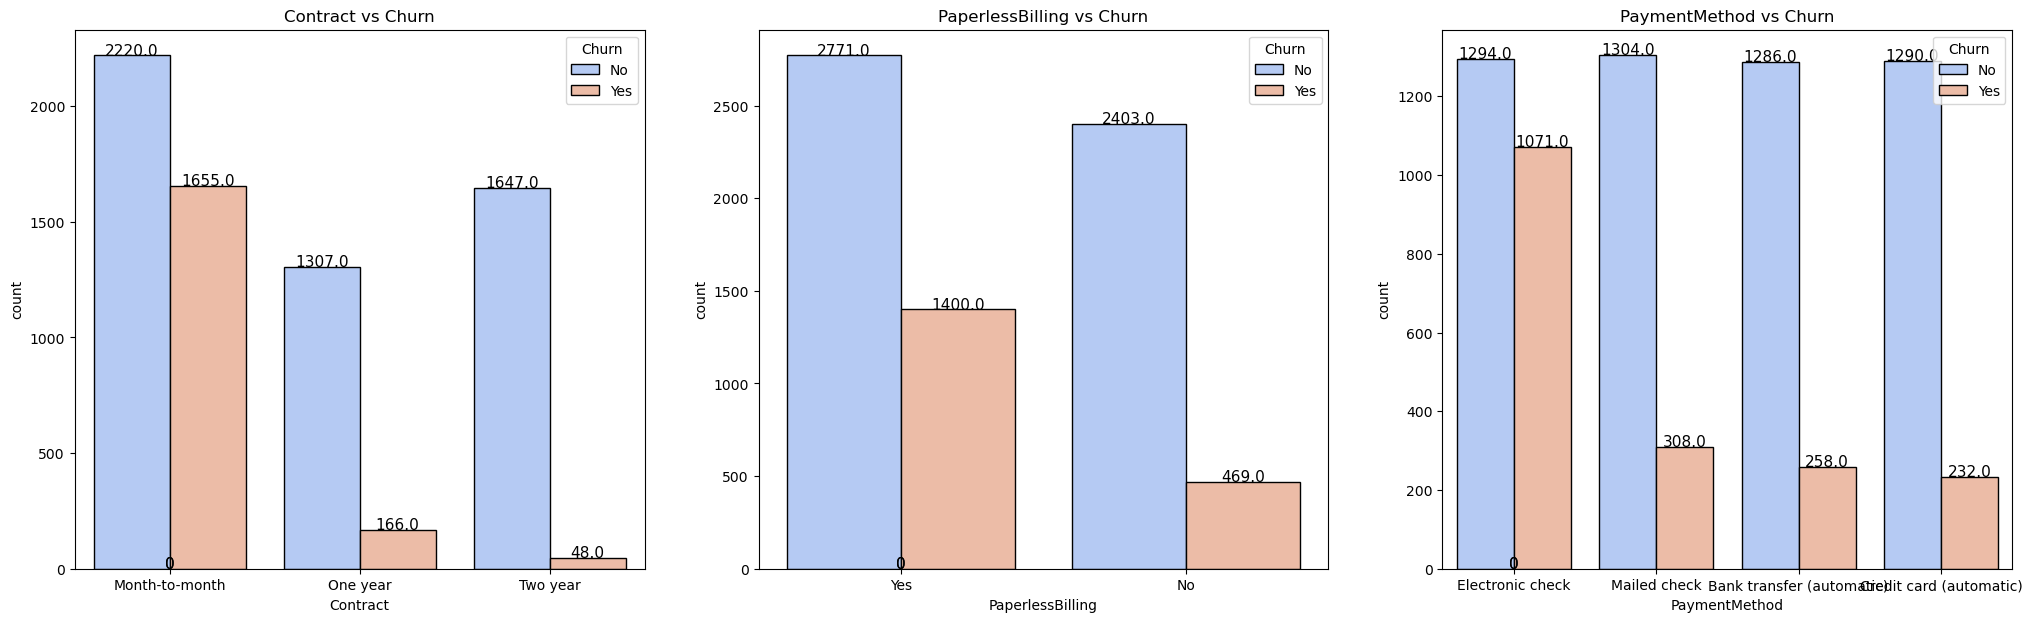

In [227]:
#Contract | PaperlessBilling | PaymentMethod 
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=l3[0],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[0] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,2)
ax = sns.countplot(x=l3[1],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[1] + ' vs Churn'
plt.title(title);

plt.subplot(1,3,3)
ax = sns.countplot(x=l3[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = l3[2] + ' vs Churn'
plt.title(title);


<Axes: xlabel='tenure'>

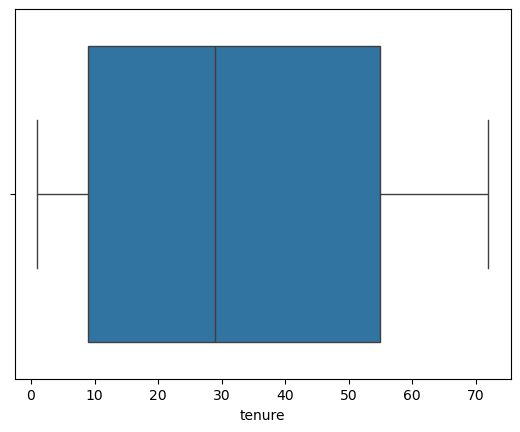

In [228]:
# Detecting Outliers
sns.boxplot(x=df2['tenure'])

<Axes: xlabel='MonthlyCharges'>

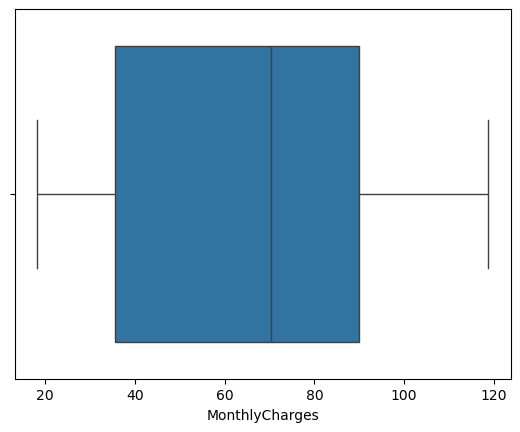

In [229]:
sns.boxplot(x=df2['MonthlyCharges'])

<Axes: xlabel='TotalCharges'>

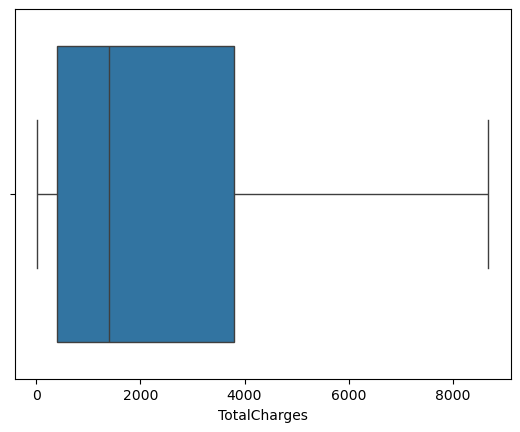

In [230]:
sns.boxplot(x=df2['TotalCharges'])

In [231]:
categorical_features=["Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity" ,"OnlineBackup" , "DeviceProtection", "TechSupport","StreamingTV" ,"StreamingMovies","Contract", "PaperlessBilling", "PaymentMethod","InternetService"]
numerical_features =['tenure', 'MonthlyCharges', 'TotalCharges']
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SeniorCitizen          0.0000
Partner                1.0000
Dependents             1.0000
tenure                46.0000
PhoneService           0.0000
MultipleLines          1.0000
InternetService        1.0000
OnlineSecurity         1.0000
OnlineBackup           1.0000
DeviceProtection       1.0000
TechSupport            1.0000
StreamingTV            1.0000
StreamingMovies        1.0000
Contract               1.0000
PaperlessBilling       1.0000
PaymentMethod          1.0000
MonthlyCharges        54.2750
TotalCharges        3393.2875
Churn                  1.0000
dtype: float64


In [232]:
#filter out outliers
df3 = df2[~((df2 < (Q1 - 0.25 * IQR)) | (df2 > (Q3 + 0.25 * IQR))).any(axis=1)]
df3.shape

(1546, 19)

In [233]:
#Data scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df2['tenure'] = mms.fit_transform(df2[['tenure']])
df2['MonthlyCharges'] = mms.fit_transform(df2[['MonthlyCharges']])
df2['TotalCharges'] = mms.fit_transform(df2[['TotalCharges']])
df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,0,2,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.619718,0,2,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


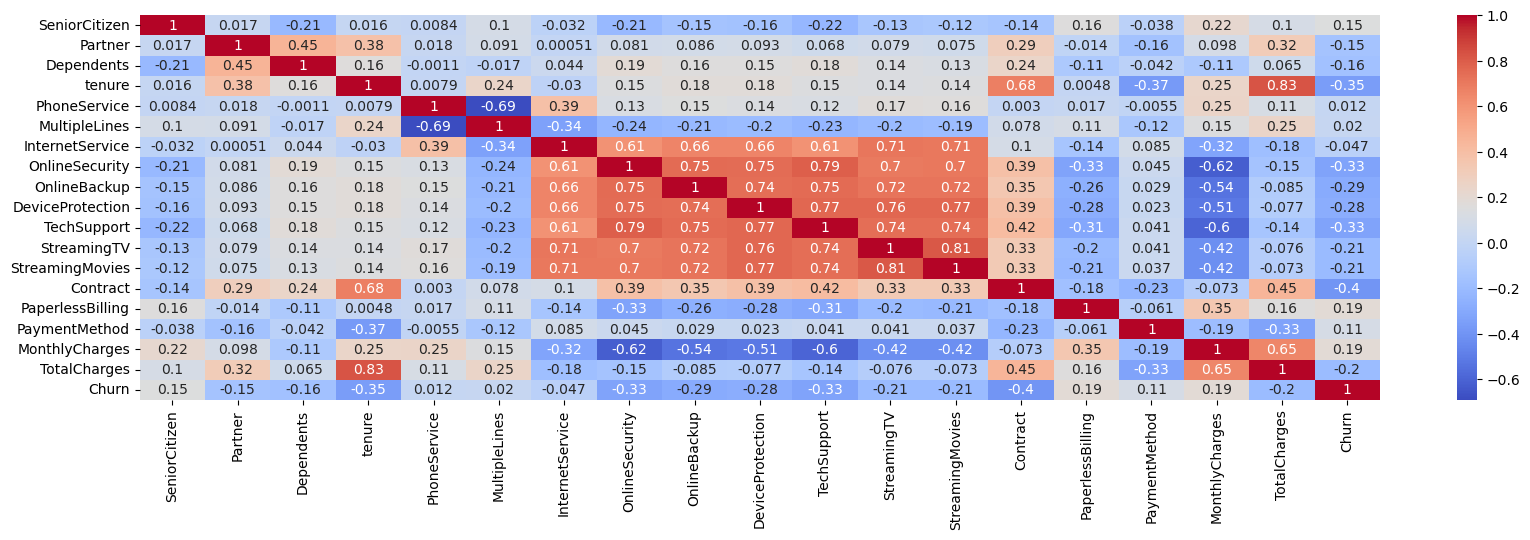

In [234]:
# Calculate correlation matrix
plt.figure(figsize = (20,5))
sns.heatmap(df2.corr(),cmap = 'coolwarm',annot = True);

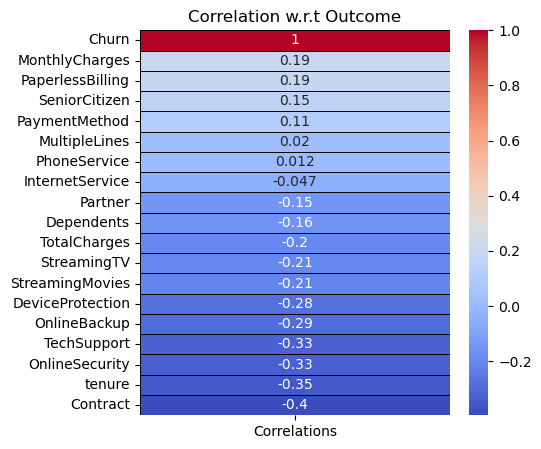

In [235]:
corr = df2.corrwith(df2['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

In [236]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif

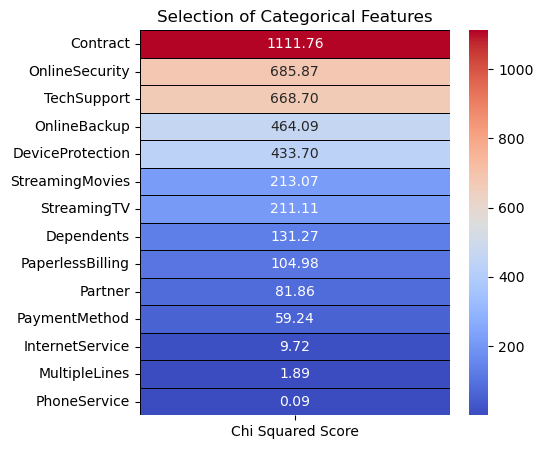

In [237]:

#Feature Selection for Categorical Features
#Chi-Squared Test 
features = df2.loc[:,categorical_features]
target = df2.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

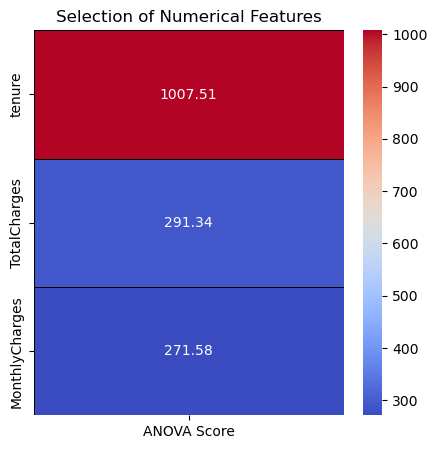

In [238]:
#ANOVA test
features = df2.loc[:,numerical_features]
target = df2.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [239]:
df2.drop(columns = ['PhoneService','MultipleLines','InternetService'],inplace = True)


In [250]:
df1 = df2.copy()

In [252]:
df1.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [254]:
# split data into X and y
X = df1.drop('Churn', axis=1)
Y = df1['Churn']
# data into train and split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [282]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {}),  # No hyperparameters for Naive Bayes
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),  # Hyperparameters for Logistic Regression
        {'model__C': [0.01, 0.1, 1, 10, 100],
         'model__max_iter': [100, 200, 300]})
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, Y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(Y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)
    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", round(accuracy, 3),"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)

Model: Random Forest
Test Accuracy: 0.812 %

Model: XG Boost
Test Accuracy: 0.812 %

Model: Naive Bayes
Test Accuracy: 0.711 %

Model: Logistic Regression
Test Accuracy: 0.736 %

Best Model:
Test Accuracy: 0.8123667377398721


In [283]:
#Data Balancing using SMOTE
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [284]:
over = SMOTE(sampling_strategy = 1)

f1 = df2.iloc[:,:15].values
t1 = df2.iloc[:,15].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5163, 1: 5163})

In [285]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [286]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [287]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
     # Make predictions
    predictions = classifier.predict(x_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    # Print classification report
    #print(classification_report(y_test, predictions))

    return accuracy, precision, recall, f1, roc_auc

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [288]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

Cross Validation Score :  82.25%
ROC_AUC Score :  74.86%
              precision    recall  f1-score   support

           0       0.82      0.65      0.73      1062
           1       0.70      0.84      0.76      1004

    accuracy                           0.75      2066
   macro avg       0.76      0.75      0.74      2066
weighted avg       0.76      0.75      0.74      2066



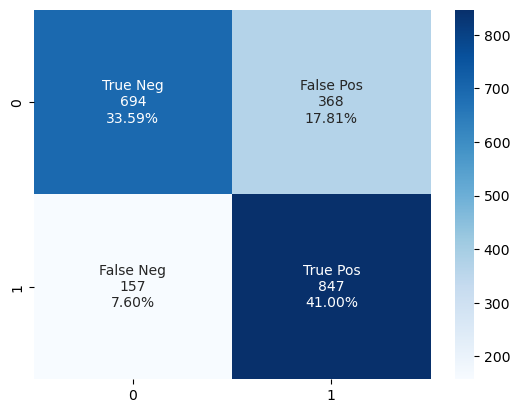

In [289]:
classifier_nb = GaussianNB()  
model(classifier_nb, x_train, y_train, x_test, y_test)
model_evaluation(classifier_nb, x_test, y_test)

In [290]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [291]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

Cross Validation Score :  90.39%
ROC_AUC Score :  82.86%


(0.8272023233301065,
 0.7890974084003575,
 0.8794820717131474,
 0.8318417333961375,
 0.8286299247454626)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1062
           1       0.79      0.88      0.83      1004

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



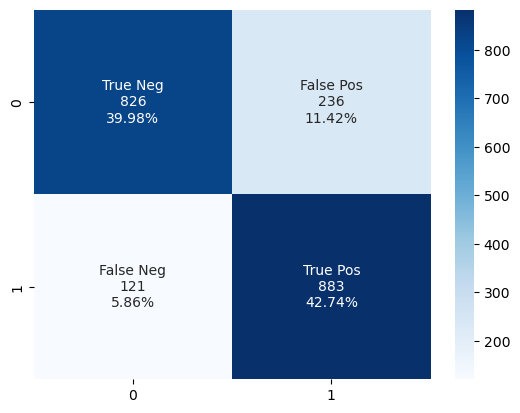

In [292]:
xgboost_metrics = model_evaluation(classifier_xgb,x_test,y_test)

In [293]:
from sklearn.ensemble import RandomForestClassifier

In [294]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

In [295]:
model(classifier_rf,x_train,y_train,x_test,y_test)

Cross Validation Score :  85.79%
ROC_AUC Score :  77.90%


(0.7773475314617618,
 0.7381786339754816,
 0.8396414342629482,
 0.7856477166821995,
 0.7790485890712104)

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1062
           1       0.74      0.84      0.79      1004

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



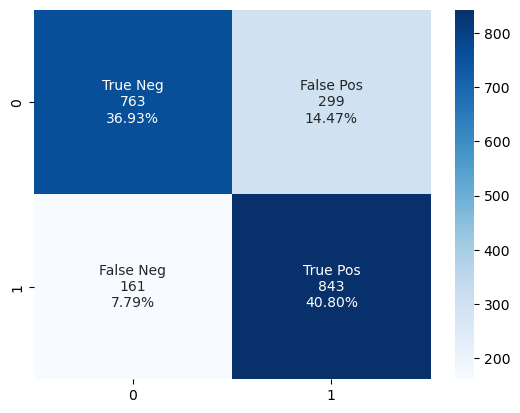

In [296]:
RandomForestClassifier_metrics = model_evaluation(classifier_rf,x_test,y_test)

In [297]:
from sklearn.linear_model import LogisticRegression

Cross Validation Score :  85.14%
ROC_AUC Score :  77.00%
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1062
           1       0.74      0.82      0.77      1004

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



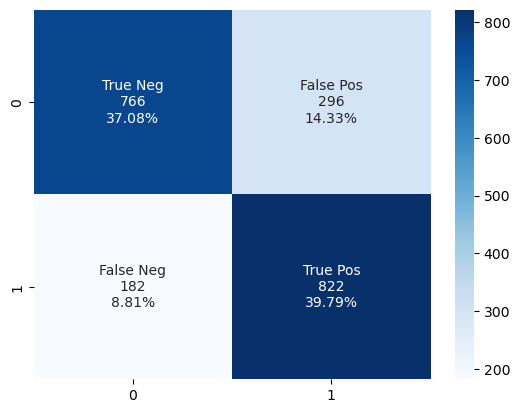

In [298]:
classifier_lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
model(classifier_lr, x_train, y_train, x_test, y_test)
logistic_metrics = model_evaluation(classifier_lr, x_test, y_test)

In [299]:
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Logistic Regression Parameters: {'C': 100, 'max_iter': 100}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Tuned Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1062
           1       0.74      0.83      0.78      1004

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066

Tuned XGBoost Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1062
           1       0.82      0.86      0.84      1004

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



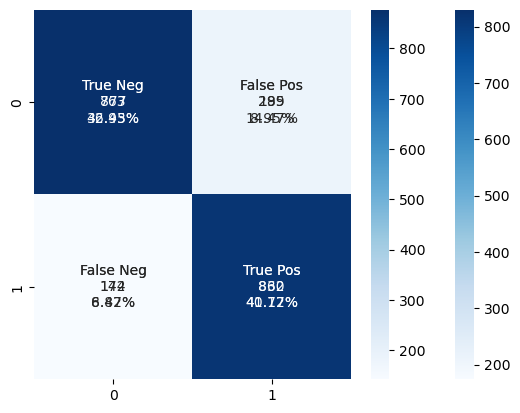

In [300]:

# Hyperparameter tuning for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'max_iter': [100, 200, 300]
}

lr_grid_search = GridSearchCV(estimator=classifier_lr, param_grid=lr_param_grid,
                               scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
lr_grid_search.fit(x_train, y_train)

print("Best Logistic Regression Parameters:", lr_grid_search.best_params_)
best_lr_classifier = lr_grid_search.best_estimator_

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

xgb_grid_search = GridSearchCV(estimator=classifier_xgb, param_grid=xgb_param_grid,
                                scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
xgb_grid_search.fit(x_train, y_train)

print("Best XGBoost Parameters:", xgb_grid_search.best_params_)
best_xgb_classifier = xgb_grid_search.best_estimator_

# Evaluate the tuned Logistic Regression model
print("Tuned Logistic Regression Evaluation:")
model_evaluation(best_lr_classifier, x_test, y_test)

# Evaluate the tuned XGBoost model
print("Tuned XGBoost Evaluation:")
model_evaluation(best_xgb_classifier, x_test, y_test)